# Sentiment Analysis of Hesitency of coivd-19 booster dose around the world

Sentiment analysis, also known as opinion mining, is a natural language processing (NLP) technique that aims to discern the emotional tone conveyed in the text. The sentiment analysis process involves the automatic collection and analysis of subjective judgments regarding different aspects of an item.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Processed.csv', engine='python')

In [ ]:
df.head()

,Date,Tweet,PreProcessed_Tweets,Lang,Translated
0,2022-12-30 23:50:31+00:00,Covid-19: Free booster for 18-59 age bracket s...,covid free booster age bracket still maharashtra,en,covid free booster age bracket still maharashtra
1,2022-12-30 23:46:36+00:00,Even though you have received a booster vaccin...,even though received booster vaccine dont forg...,en,even though received booster vaccine dont forg...
2,2022-12-30 23:43:24+00:00,MRNA vaccines raise the risk of contracting CO...,mrna vaccines raise risk contracting covid mrn...,en,mrna vaccines raise risk contracting covid mrn...
3,2022-12-30 23:34:54+00:00,Fact Check: WHO Director-General Did NOT Say C...,fact check directorgeneral say countries givin...,en,fact check directorgeneral say countries givin...
4,2022-12-30 23:31:18+00:00,@BenWarbrooke @MainStInvst @paintedcoin @Novav...,see cdc website doses pfizer updated covid boo...,en,see cdc website doses pfizer updated covid boo...


In [ ]:
df.Tweet.isna().sum()

0

In [ ]:
df = df.dropna()
df.shape

(208252, 5)

### Text Mining (NLTK)

Natural Language Processing (NLP) is an area of computer science that focuses on the examination and interpretation of text.
- NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

import textblob
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

In [ ]:
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [ ]:
import string
import re

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
eng_stop_words = list(stopwords.words('english'))

In [ ]:
pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.5.1-py2.py3-none-any.whl size=351210 sha256=a055046624846b966998efe8b1d8c514acabc53050dafef87f2033218557bc72
  Stored in directory: /root/.cache/pip/wheels/51/92/44/e2ef13f803aa08711819357e6de0c5fe67b874671141413565
Successfully built emoji


In [ ]:
import emoji

In [ ]:
def ProcessedTweets(text):
  text = text.lower()

  # Removing @ and links and spaces
  text = ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t]) |(\w+:\/\/\S+)', ' ', text).split())
  # Removing hashtags and digits
  text = re.sub(r'\@\w+|\#\w+|\d+', ' ', text)

  # removing punctuation and numbers
  punct = str.maketrans('','',string.punctuation)
  text = text.translate(punct)

  # Remove special characters
  text = re.sub(r'[^\w\s]', ' ', text)


  # converting emojis to words
  text = emoji.demojize(text, delimiters=(" ", " "))
  tokens = word_tokenize(text)

  # removing stopwords
  filtered_words = [w for w in tokens if w not in eng_stop_words]

  # lemmetizing words
  stem_words = [porter.stem(lemmatizer.lemmatize(w)) for w in filtered_words]
  # lemma_words = [lemmatizer.lemmatize(porter.stem(w)) for w in filtered_words]
  # lemma_words = [lemmatizer.lemmatize(w) for w in filtered_words]
  # stem_words = [porter.stem(w) for w in lemma_words]

  text = " ".join(stem_words)
  # text = " ".join(lemma_words)
  # text = " ".join(filtered_words)

  return text

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
df['Processed_Tweets']=df['Translated'].apply(ProcessedTweets)

In [ ]:
tweets_string = df['Processed_Tweets'].tolist()
tweets_string = " ".join(tweets_string)

In [ ]:
df = df.drop_duplicates(subset = ['Processed_Tweets'])
df.shape

(207102, 6)

In [ ]:
w_count = df['Processed_Tweets'].str.split(expand=True).stack().value_counts()

In [ ]:
# Function for polarity score
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Function to get sentiment type
#setting the conditions
def sentimenttextblob(polarity):
    if polarity < 0:
        return "Negative"
    elif polarity == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
# using the functions to get the polarity and sentiment
df['Polarity'] = df['Processed_Tweets'].apply(polarity)
df['Sentiment'] = df['Polarity'].apply(sentimenttextblob)
sent = df['Sentiment'].value_counts()
sent

Neutral     95956
Positive    84250
Negative    26896
Name: Sentiment, dtype: int64

In [ ]:
dates=[]
for d in df['Date']:
  dates.append(d.split(' ')[0])

# dates
df = df.drop(['Date'], axis='columns')

In [ ]:
df['Date'] = pd.to_datetime(dates, errors = 'coerce')
df.head(2)

,Tweet,PreProcessed_Tweets,Lang,Translated,Processed_Tweets,Polarity,Sentiment,Date
0,Covid-19: Free booster for 18-59 age bracket s...,covid free booster age bracket still maharashtra,en,covid free booster age bracket still maharashtra,covid free booster age bracket still maharashtra,0.4,Positive,2022-12-30
1,Even though you have received a booster vaccin...,even though received booster vaccine dont forg...,en,even though received booster vaccine dont forg...,even though receiv booster vaccin dont forget ...,0.0,Neutral,2022-12-30


In [ ]:
df.sort_values('Date')

,Tweet,PreProcessed_Tweets,Lang,Translated,Processed_Tweets,Polarity,Sentiment,Date
208251,"@YAYshamsaldeen Doctor ,the infection triggers...",doctor infection triggers immune systems respo...,en,doctor infection triggers immune systems respo...,doctor infect trigger immun system respons way...,0.000000,Neutral,2021-05-01
208219,Health officials say we will likely need a boo...,health officials say likely need booster shot ...,en,health officials say likely need booster shot ...,health offici say like need booster shot covid...,0.000000,Neutral,2021-05-01
208220,@DrTomFrieden @DanRather I mean we're already ...,mean already told pfizer need booster later mo...,en,mean already told pfizer need booster later mo...,mean alreadi told pfizer need booster later mo...,-0.097500,Negative,2021-05-01
208221,@drmwarner decreasing protection post 5 weeks ...,decreasing protection post weeks without boost...,en,decreasing protection post weeks without boost...,decreas protect post week without booster worr...,-0.700000,Negative,2021-05-01
208222,@mirza_sundus Kind of because the whole virus ...,sundus kind whole virus vaccine uses weakened ...,en,sundus kind whole virus vaccine uses weakened ...,sundu kind whole viru vaccin us weaken deactiv...,0.266667,Positive,2021-05-01
...,...,...,...,...,...,...,...,...
220,Take the step towards good health &amp; everyo...,take step towards good health amp everyones we...,en,take step towards good health amp everyones we...,take step toward good health amp everyon wellb...,0.418182,Positive,2022-12-30
221,Come on guys let's get all your booster shots ...,come guys lets get booster shots today stay aw...,en,come guys lets get booster shots today stay aw...,come guy let get booster shot today stay away ...,0.136364,Positive,2022-12-30
222,We all should take a resolution that we have t...,take resolution apply booster dose covid save ...,en,take resolution apply booster dose covid save ...,take resolut appli booster dose covid save u d...,0.000000,Neutral,2022-12-30
225,We have to get booster dose now and necessary ...,get booster dose necessary fighting covid new ...,en,get booster dose necessary fighting covid new ...,get booster dose necessari fight covid new var...,0.136364,Positive,2022-12-30


In [ ]:
# df.to_csv("Processed_new.csv")
df.to_csv("Processed_Stemming_Lemmatization.csv")

## Data Vizualization (Vizual Information)

Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sn

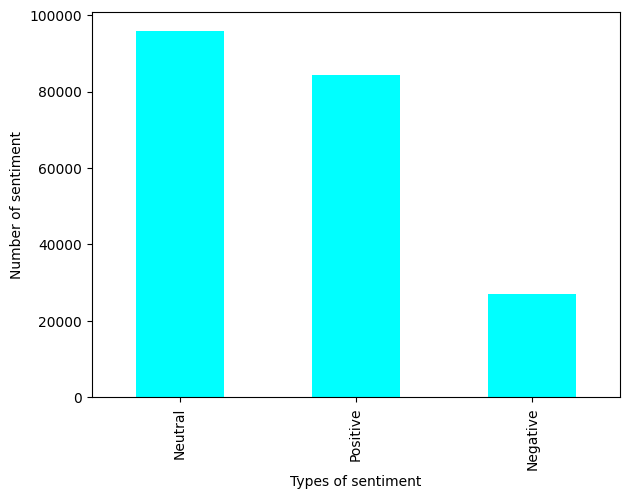

In [ ]:
# plotting bar chart for the Sentiment
plt.subplot(1,2,1)
sent.plot(kind='bar', color=['cyan'], figsize=(15,5))
# plt.title('Sentiment percieved for the booster dose', fontstyle='italic', fontsize=10)
plt.xlabel('Types of sentiment')
plt.ylabel('Number of sentiment');

In [ ]:
from wordcloud import ImageColorGenerator
from PIL import Image

In [ ]:
w = WordCloud()
stop_words = list(w.stopwords)
custom_stop_words = ['booster', 'covid', 'vaccin', 'shot', 'dose']
stop_words = set(stop_words + custom_stop_words)

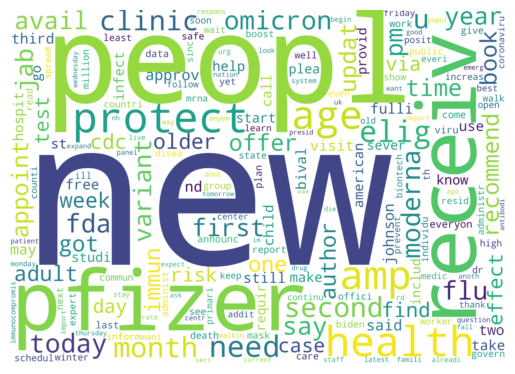

In [ ]:
# Displaying the most talked about word in a word cloud
# some stop words were still evident but was removed during visualization on Power BI
# Instantiate the Twitter word cloud object
w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'white', width = 7000, height = 5000, stopwords=stop_words).generate(tweets_string)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
summ_dates = df.resample('M', on='Date').mean()
summ_dates

<ipython-input-76-0686683be157>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  summ_dates = df.resample('M', on='Date').mean()


,Polarity
Date,
2021-05-31,0.072802
2021-06-30,0.053333
2021-07-31,0.059082
2021-08-31,0.036961
2021-09-30,0.054163
2021-10-31,0.065173
2021-11-30,0.070470
2021-12-31,0.068047
2022-01-31,0.065559


In [ ]:
positive = df[df['Sentiment']=='Positive']
negative = df[df['Sentiment']=='Negative']
neutral = df[df['Sentiment']=='Neutral']

In [ ]:
# pos = list(word for word in text for text in positive['Processed_Tweets'].str.split())
pos_words = []
neg_words = []
neu_words = []

text = positive['Processed_Tweets'].str.split()
for word in text:
  for i in word:
    pos_words.append(i)

text = negative['Processed_Tweets'].str.split()
for word in text:
  for i in word:
    neg_words.append(i)

text = neutral['Processed_Tweets'].str.split()
for word in text:
  for i in word:
    neu_words.append(i)

In [ ]:
common = list(set(pos_words)&set(neg_words)&set(neu_words))

In [ ]:
common

['bone',
 'stringent',
 'seiz',
 'casualti',
 'zelenski',
 'nervou',
 'alleg',
 'sydney',
 'filipino',
 'o',
 'nonessenti',
 'liz',
 'stock',
 'ani',
 'huffpost',
 'expert',
 'tropm',
 'tax',
 'juni',
 'cannabi',
 'peak',
 'cmr',
 'defens',
 'salina',
 'preteen',
 'door',
 'investig',
 'pharmaceut',
 'mansion',
 'slash',
 'hammersmith',
 'brooklyn',
 'philadelphia',
 'detect',
 'bibl',
 'fwiw',
 'leak',
 'webinar',
 'mmr',
 'indirectli',
 'undertak',
 'jb',
 'nejm',
 'gao',
 'horowitz',
 'rectifi',
 'amend',
 'bod',
 'robinson',
 'iran',
 'kcra',
 'tribun',
 'accept',
 'manufactur',
 'precovid',
 'uncheck',
 'inexplic',
 'diagnost',
 'utah',
 'greenridg',
 'quo',
 'insuffici',
 'haverhil',
 'sub',
 'ditch',
 'cater',
 'thorough',
 'nonetheless',
 'dartmouth',
 'implic',
 'biggi',
 'andhra',
 'kirk',
 'judgment',
 'equat',
 'vatican',
 'callahan',
 'gavin',
 'microsoft',
 'intranas',
 'dilemma',
 'jumpshot',
 'tag',
 'hoop',
 'tif',
 'necessarili',
 'dph',
 'roussin',
 'finn',
 'shock',

In [ ]:
positive.head(2)

,Tweet,PreProcessed_Tweets,Lang,Translated,Processed_Tweets,Polarity,Sentiment,Date
0,Covid-19: Free booster for 18-59 age bracket s...,covid free booster age bracket still maharashtra,en,covid free booster age bracket still maharashtra,covid free booster age bracket still maharashtra,0.400000,Positive,2022-12-30
6,Keep your bubble protected by keeping omicron ...,keep bubble protected keeping omicron flu get ...,en,keep bubble protected keeping omicron flu get ...,keep bubbl protect keep omicron flu get protec...,0.133333,Positive,2022-12-30


In [ ]:
positive_string = positive['Processed_Tweets'].tolist()
positive_string = " ".join(positive_string)

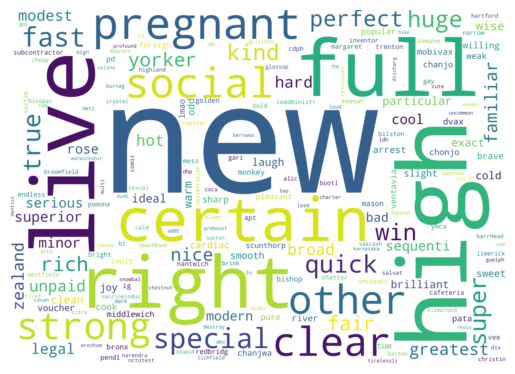

In [ ]:
w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'white', width = 7000, height = 5000, stopwords=common).generate(positive_string)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
# plt.title('Positive Words')
plt.show()

In [ ]:
positive_values = positive.resample('M', on='Date').Sentiment.value_counts().values
positive_values

array([  659,   566,  1443,  3480,  6524,  6107,  9213, 12248,  8968,
        3710,  4000,  3343,  2326,  2122,  2939,  2539,  4756,  4000,
        2784,  2523])

In [ ]:
negative.head(2)

,Tweet,PreProcessed_Tweets,Lang,Translated,Processed_Tweets,Polarity,Sentiment,Date
4,@BenWarbrooke @MainStInvst @paintedcoin @Novav...,see cdc website doses pfizer updated covid boo...,en,see cdc website doses pfizer updated covid boo...,see cdc websit do pfizer updat covid booster a...,-0.331818,Negative,2022-12-30
5,"20th December 2021\n\n""Dr"" Tedros, the Directo...",th december dr tedros directorgeneral world he...,en,th december dr tedros directorgeneral world he...,th decemb dr tedro directorgener world health ...,-0.133333,Negative,2022-12-30


In [ ]:
negative_string = negative['Processed_Tweets'].tolist()
negative_string = " ".join(negative_string)

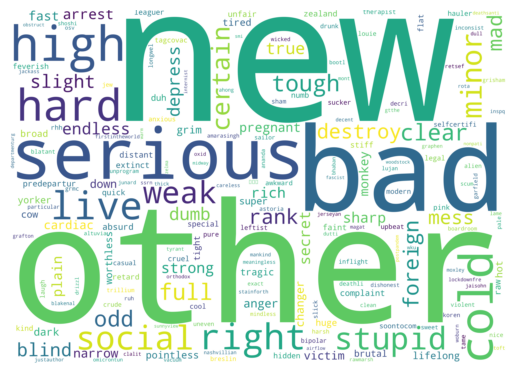

In [ ]:
w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'white', width = 7000, height = 5000,stopwords=common).generate(negative_string)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
# plt.title('Negative Words')
plt.show()

In [ ]:
negative_values = negative.resample('M', on='Date').Sentiment.value_counts().values
negative_values

array([ 219,  192,  509, 1602, 1936, 2181, 2469, 4095, 3110, 1372, 1114,
       1035,  909,  663,  792,  695, 1143, 1158,  843,  859])

In [ ]:
neutral.head(2)

,Tweet,PreProcessed_Tweets,Lang,Translated,Processed_Tweets,Polarity,Sentiment,Date
1,Even though you have received a booster vaccin...,even though received booster vaccine dont forg...,en,even though received booster vaccine dont forg...,even though receiv booster vaccin dont forget ...,0.0,Neutral,2022-12-30
2,MRNA vaccines raise the risk of contracting CO...,mrna vaccines raise risk contracting covid mrn...,en,mrna vaccines raise risk contracting covid mrn...,mrna vaccin rais risk contract covid mrna vacc...,0.0,Neutral,2022-12-30


In [ ]:
neutral_string = neutral['Processed_Tweets'].tolist()
neutral_string = " ".join(neutral_string)

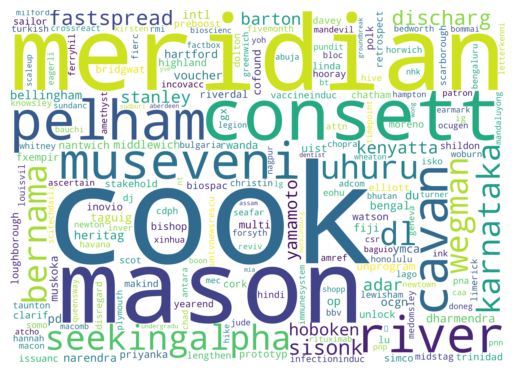

In [ ]:
w_cloud = WordCloud(collocations = False,max_words=200, background_color = 'white', width = 7000, height = 5000, stopwords=common).generate(neutral_string)

# Display the generated Word Cloud
plt.imshow(w_cloud, interpolation='bilinear')
plt.axis("off")
# plt.title('Neutral Words')
plt.show()

In [ ]:
neutral_values = neutral.resample('M', on='Date').Sentiment.value_counts().values
neutral_values

array([ 1079,   909,  2453,  7533,  8961,  9088,  9114, 14174,  9838,
        4018,  3558,  3621,  2633,  2057,  2815,  2357,  4111,  3411,
        2106,  2120])

In [ ]:
summ_dates = summ_dates.drop(['Polarity'], axis='columns')

In [ ]:
summ_dates['Positive'] = positive_values
summ_dates['Negative'] = negative_values
summ_dates['Neutral'] = neutral_values

In [ ]:
summ_dates = summ_dates.reset_index()
summ_dates

,Date,Positive,Negative,Neutral
0,2021-05-31,659,219,1079
1,2021-06-30,566,192,909
2,2021-07-31,1443,509,2453
3,2021-08-31,3480,1602,7533
4,2021-09-30,6524,1936,8961
5,2021-10-31,6107,2181,9088
6,2021-11-30,9213,2469,9114
7,2021-12-31,12248,4095,14174
8,2022-01-31,8968,3110,9838
9,2022-02-28,3710,1372,4018


In [ ]:
col_list= list(summ_dates)
# col_list.remove('Unnamed: 0.4')
# col_list.remove('Date')
# col_list.remove('Total')

In [ ]:
summ_dates['Total'] = summ_dates[col_list].sum(axis=1)
summ_dates

<ipython-input-97-921612f7b534>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  summ_dates['Total'] = summ_dates[col_list].sum(axis=1)


,Date,Positive,Negative,Neutral,Total
0,2021-05-31,659,219,1079,1957
1,2021-06-30,566,192,909,1667
2,2021-07-31,1443,509,2453,4405
3,2021-08-31,3480,1602,7533,12615
4,2021-09-30,6524,1936,8961,17421
5,2021-10-31,6107,2181,9088,17376
6,2021-11-30,9213,2469,9114,20796
7,2021-12-31,12248,4095,14174,30517
8,2022-01-31,8968,3110,9838,21916
9,2022-02-28,3710,1372,4018,9100


Text(0, 0.5, 'Tweet Counts')

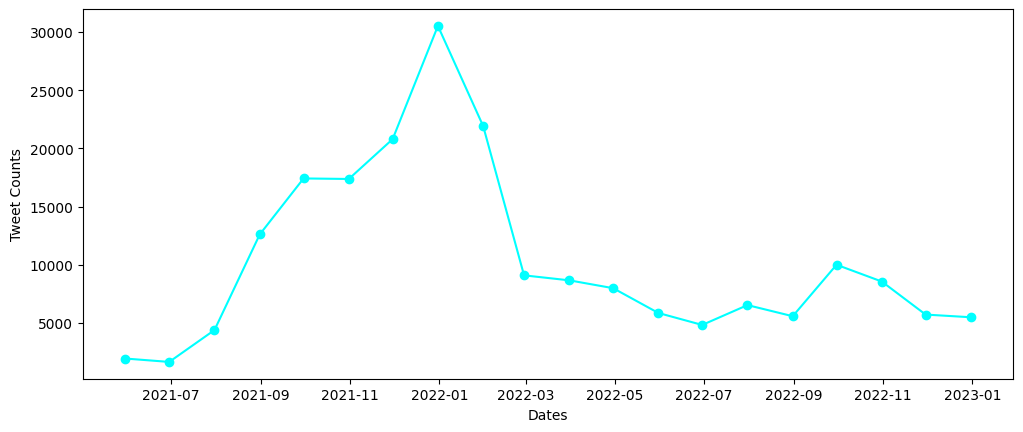

In [ ]:
fig = plt.figure()
fig.set_figwidth(12)

plt.scatter(summ_dates['Date'].values,summ_dates['Total'], color = 'cyan')
plt.plot(summ_dates['Date'].values,summ_dates['Total'], color = 'cyan')

plt.xlabel('Dates')
plt.ylabel('Tweet Counts')

# plt.title("Fig : Monthwise tweets of users", fontstyle='italic', fontsize=10)

Text(0, 0.5, 'Tweet Counts')

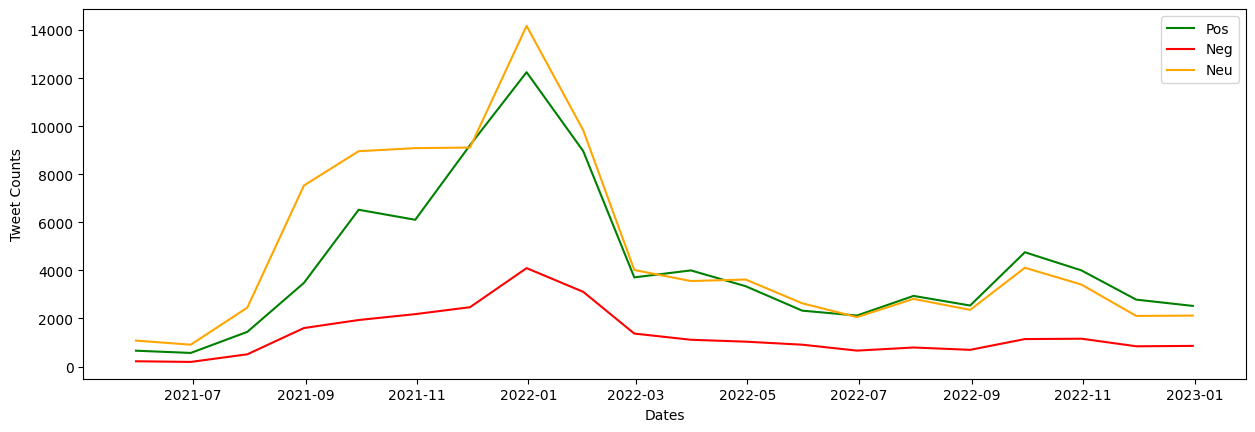

In [ ]:
fig = plt.figure()
fig.set_figwidth(15)


plt.plot(summ_dates['Date'].values,summ_dates['Positive'], color = 'green', label = 'Pos')
plt.plot(summ_dates['Date'].values,summ_dates['Negative'], color = 'red', label = 'Neg')
plt.plot(summ_dates['Date'].values,summ_dates['Neutral'], color = 'orange', label = 'Neu')
plt.legend()

plt.xlabel('Dates')
plt.ylabel('Tweet Counts')

# plt.title("Fig : Overall sentiments of people regarding COVID-19 variants and booster dose", fontstyle='italic', fontsize=10)

In [ ]:
bef_booster = summ_dates[:5]
bef_booster

,Date,Positive,Negative,Neutral,Total
0,2021-05-31,659,219,1079,1957
1,2021-06-30,566,192,909,1667
2,2021-07-31,1443,509,2453,4405
3,2021-08-31,3480,1602,7533,12615
4,2021-09-30,6524,1936,8961,17421


Text(0, 0.5, 'Tweet Counts')

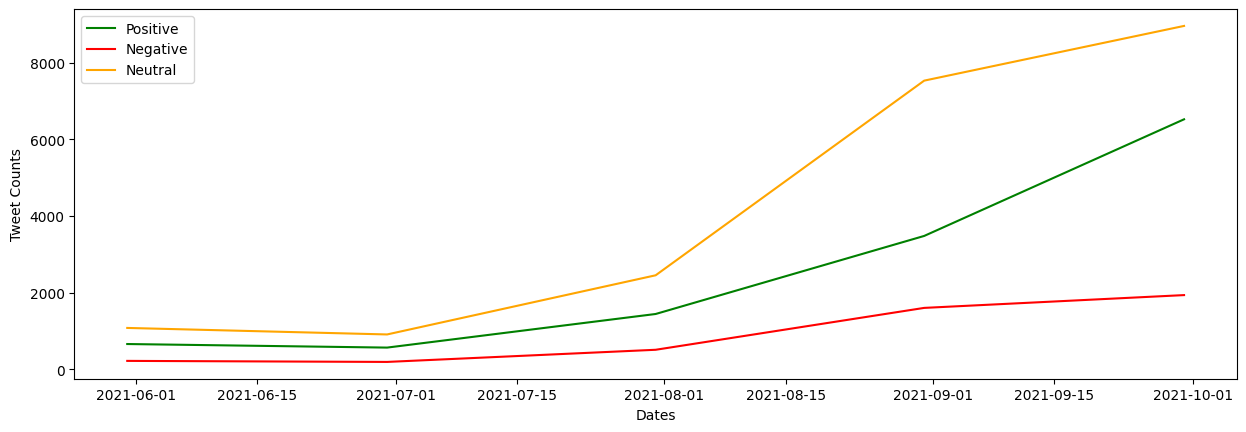

In [ ]:
fig = plt.figure()
fig.set_figwidth(15)

plt.plot(bef_booster['Date'].values,bef_booster['Positive'], color = 'green', label = 'Positive')
plt.plot(bef_booster['Date'].values,bef_booster['Negative'], color = 'red', label = 'Negative')
plt.plot(bef_booster['Date'].values,bef_booster['Neutral'], color = 'orange', label = 'Neutral')
plt.legend()

plt.xlabel('Dates')
plt.ylabel('Tweet Counts')
# plt.title("Fig : Sentiments of people regarding COVID-19 booster dose (Delta variant)", fontstyle='italic', fontsize=10)

In [ ]:
aft_booster = summ_dates[2:7]
aft_booster

,Date,Positive,Negative,Neutral,Total
2,2021-07-31,1443,509,2453,4405
3,2021-08-31,3480,1602,7533,12615
4,2021-09-30,6524,1936,8961,17421
5,2021-10-31,6107,2181,9088,17376
6,2021-11-30,9213,2469,9114,20796


Text(0, 0.5, 'Tweet Counts')

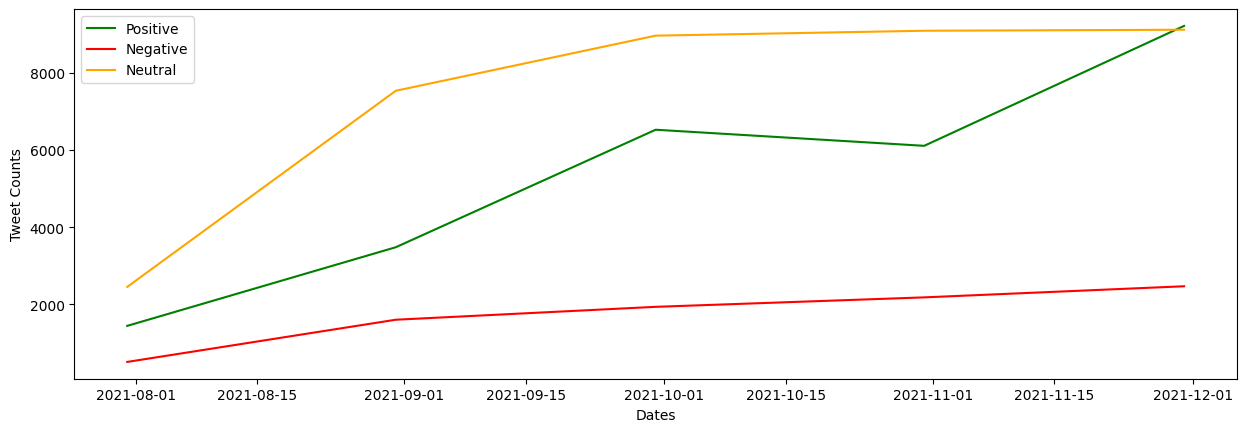

In [ ]:
fig = plt.figure()
fig.set_figwidth(15)

plt.plot(aft_booster['Date'].values,aft_booster['Positive'], color = 'green', label = 'Positive')
plt.plot(aft_booster['Date'].values,aft_booster['Negative'], color = 'red', label = 'Negative')
plt.plot(aft_booster['Date'].values,aft_booster['Neutral'], color = 'orange', label = 'Neutral')
plt.legend()

plt.xlabel('Dates')
plt.ylabel('Tweet Counts')
# plt.title("Fig : Sentiments of people regarding COVID-19 booster dose (Booster dose announcement)", fontstyle='italic', fontsize=10)

In [ ]:
omicron = summ_dates[6:11]
omicron

,Date,Positive,Negative,Neutral,Total
6,2021-11-30,9213,2469,9114,20796
7,2021-12-31,12248,4095,14174,30517
8,2022-01-31,8968,3110,9838,21916
9,2022-02-28,3710,1372,4018,9100
10,2022-03-31,4000,1114,3558,8672


Text(0, 0.5, 'Tweet Counts')

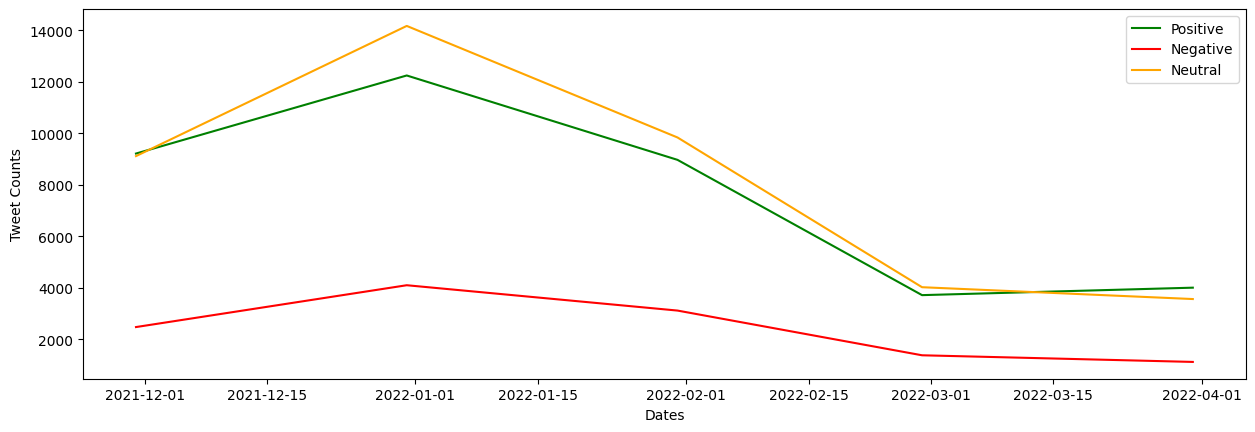

In [ ]:
fig = plt.figure()
fig.set_figwidth(15)

plt.plot(omicron['Date'].values,omicron['Positive'], color = 'green', label = 'Positive')
plt.plot(omicron['Date'].values,omicron['Negative'], color = 'red', label = 'Negative')
plt.plot(omicron['Date'].values,omicron['Neutral'], color = 'orange', label = 'Neutral')
plt.legend()

plt.xlabel('Dates')
plt.ylabel('Tweet Counts')
# plt.title("Fig : Sentiments of people regarding COVID-19 booster dose (Omicron variant)", fontstyle='italic', fontsize=10)

In [ ]:
import numpy as np

In [ ]:
lst = summ_dates['Date'].dt.strftime("%Y-%m")


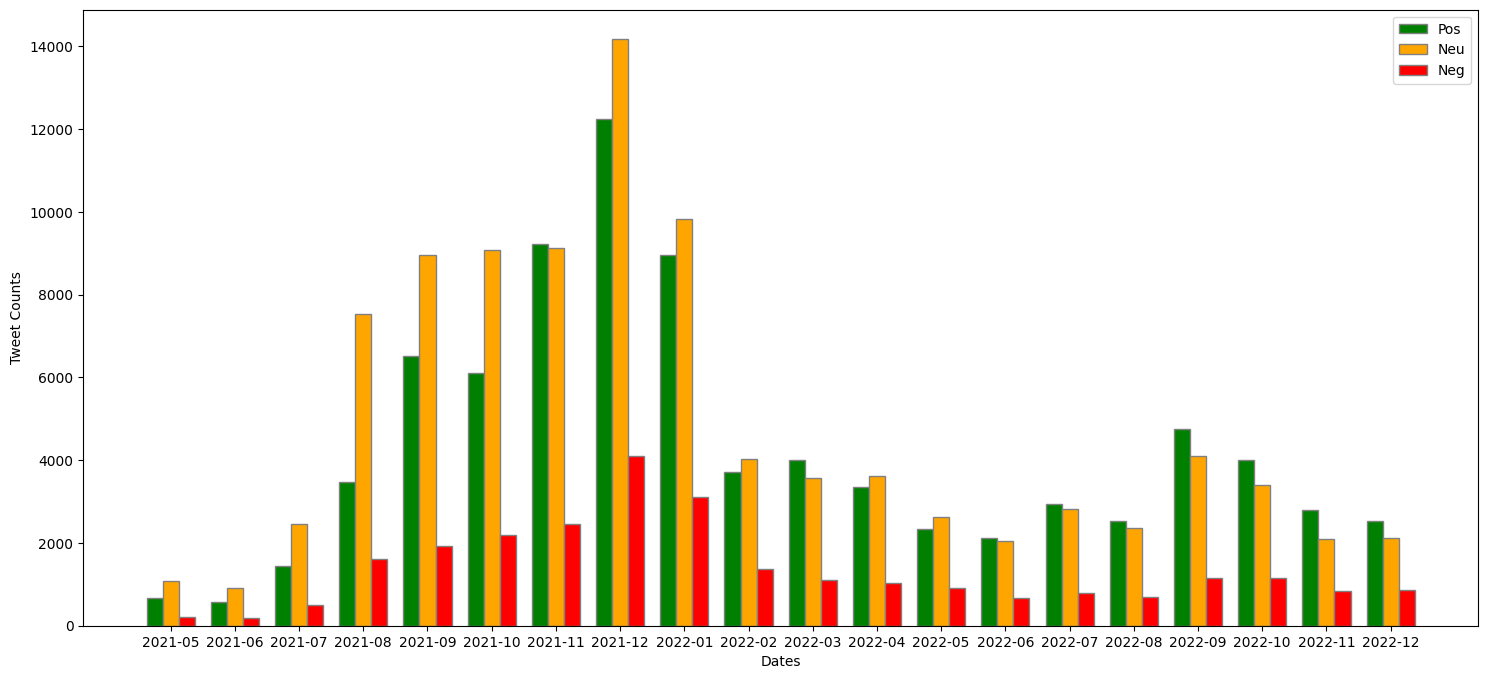

In [ ]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(18, 8))

# set height of bar
Positive = summ_dates['Positive']
Neutral = summ_dates['Neutral']
Negative = summ_dates['Negative']

# Set position of bar on X axis
br1 = np.arange(positive_values.size)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Positive, color ='green', width = barWidth,
        edgecolor ='grey', label ='Pos')
plt.bar(br2, Neutral, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Neu')
plt.bar(br3, Negative, color ='red', width = barWidth,
        edgecolor ='grey', label ='Neg')



# Adding Xticks
plt.xlabel('Dates')
plt.ylabel('Tweet Counts')
# plt.title("Fig : Monthly track of sentiments of people regarding COVID-19 booster dose vaccination hesitancy ", fontstyle='italic', fontsize=10)
plt.xticks([r + barWidth for r in range(positive_values.size)],lst)

plt.legend()
plt.show()



In [ ]:
sentiments = [positive['Sentiment'].value_counts().values,negative['Sentiment'].value_counts().values,neutral['Sentiment'].value_counts().values]


In [ ]:
sentiments_values = []
for i in sentiments:
  # i.item
  sentiments_values.append(i[0])

In [ ]:
s_labels = ['Positive', 'Negative', 'Neutral']
s_colors = ['Green', 'Red', 'Orange']
s_explode = [0.1,0.1,0.1]

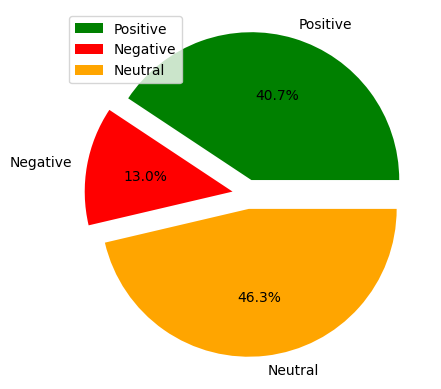

In [ ]:
plt.pie(sentiments_values, autopct='%1.1f%%', labels = s_labels, colors = s_colors, explode = s_explode)
plt.legend(loc = 'upper left')
# plt.title("Fig : Sentiments (in %) ", fontstyle='italic', fontsize=10)